In [1]:
import keras
import random, os
from keras.layers import *
from keras.models import Model, Sequential
from keras import backend as K
from glob import glob
import numpy as np
import re
from keras.utils.vis_utils import model_to_dot
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance
from IPython.display import Image
import PIL

Using TensorFlow backend.


In [2]:
batch_size = 256
num_classes = 6
epochs = 1000
img_rows, img_cols = 28, 28
label = ["circle", "square", "triangle", "horizontal", "vertical", "diagonal"]

In [3]:
def load_data():
    tr_path = './dataset/trains/'
    te_path = './dataset/tests/'
    va_path = './dataset/vals/'
    
    (tr_sets, tr_labels, _) = get_datasets_labels(tr_path)
    (te_sets, te_labels, test_labels_with_num) = get_datasets_labels(te_path)
    (va_sets, va_labels, _) = get_datasets_labels(va_path)
    
    tr_sets = np.array(tr_sets)
    te_sets = np.array(te_sets)
    va_sets = np.array(va_sets)
    tr_labels = np.array(tr_labels)
    te_labels = np.array(te_labels)
    va_labels = np.array(va_labels)
    test_labels_with_num = np.array(test_labels_with_num)
    return tr_sets, tr_labels, te_sets, te_labels, va_sets, va_labels, test_labels_with_num

In [4]:
def get_datasets_labels(path):
	files = os.listdir(path)
	labels = []
	lbs = []
	sets = []
	for file in files:
		pic = PIL.Image.open(path + file).convert('L')
		lb = file.replace(re.findall("\d+", file)[0], '').replace('.png', '') 
		forlb = file.replace('.png', '') 
		
		labels.append(label.index(lb))
		lbs.append(forlb)
		
		pic = np.array(pic)
		sets.append(pic)
	return sets, labels, lbs

In [5]:
(x_train, y_train, x_test, y_test, x_val, y_val, test_labels_with_num) = load_data()
y_test1 = y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255.
x_test /= 255.
x_val /= 255.

In [6]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
#model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))

#model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          73792     
__________

In [8]:
num = 1
for layer in model.layers:
    print(num, layer, layer.trainable)
    num = num+1

1 <keras.layers.convolutional.Conv2D object at 0x7fa9a71198d0> True
2 <keras.layers.core.Activation object at 0x7fa9a7119b00> True
3 <keras.layers.pooling.MaxPooling2D object at 0x7fa9a7119e48> True
4 <keras.layers.convolutional.Conv2D object at 0x7fa9a7119eb8> True
5 <keras.layers.core.Activation object at 0x7fa9a6e58e48> True
6 <keras.layers.pooling.MaxPooling2D object at 0x7fa9a6e04a20> True
7 <keras.layers.convolutional.Conv2D object at 0x7fa9a6e049b0> True
8 <keras.layers.core.Activation object at 0x7fa9a6d77358> True
9 <keras.layers.pooling.MaxPooling2D object at 0x7fa9a6d777f0> True
10 <keras.layers.convolutional.Conv2D object at 0x7fa9a6d0a3c8> True
11 <keras.layers.core.Activation object at 0x7fa9a6d0a4a8> True
12 <keras.layers.pooling.MaxPooling2D object at 0x7fa9a6d26a58> True
13 <keras.layers.core.Flatten object at 0x7fa9a6d26978> True
14 <keras.layers.core.Dense object at 0x7fa9a6d8aa90> True
15 <keras.layers.core.Dropout object at 0x7fa9a6d8a2e8> True
16 <keras.layers.cor

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0, validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08115735116949357
Test accuracy: 0.9883333333333333


In [11]:
model_json = model.to_json()
with open("origin_cnn_model.json", "w") as json_file : 
    json_file.write(model_json)

In [12]:
model.save_weights("origin_cnn_model.h5")
print("saved model to disk")

saved model to disk


In [13]:
origin_model = model

In [14]:
for layer in model.layers:
    layer.trainable = False

In [15]:
prev_model = model
for i in range(6):
    prev_model.pop()
prev_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          73792     
__________

/home/minji/.conda/envs/tensor/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [16]:
new_model = prev_model

In [17]:
new_model.add(Conv2D(64, (3, 3), padding='same'))
new_model.add(Activation('relu'))
new_model.add(UpSampling2D((2, 2)))

new_model.add(Conv2D(64, (3, 3), padding='same'))
new_model.add(Activation('relu'))
new_model.add(UpSampling2D((2, 2)))
new_model.add(Dropout(0.25))

new_model.add(Conv2D(64, (2, 2)))
new_model.add(Conv2D(128, (3, 3), padding='same'))
new_model.add(Activation('relu'))
new_model.add(UpSampling2D((2, 2)))

new_model.add(Conv2D(128, (3, 3), padding='same'))
new_model.add(Activation('relu'))
new_model.add(UpSampling2D((2, 2)))
#new_model.add(Dropout(0.25))

new_model.add(Conv2D(1, (3, 3), padding='same'))
new_model.add(Activation('relu'))

In [18]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          73792     
__________

In [19]:
num = 1
for layer in new_model.layers:
    print(num, layer, layer.trainable)
    num = num+1

1 <keras.layers.convolutional.Conv2D object at 0x7fa9a71198d0> False
2 <keras.layers.core.Activation object at 0x7fa9a7119b00> False
3 <keras.layers.pooling.MaxPooling2D object at 0x7fa9a7119e48> False
4 <keras.layers.convolutional.Conv2D object at 0x7fa9a7119eb8> False
5 <keras.layers.core.Activation object at 0x7fa9a6e58e48> False
6 <keras.layers.pooling.MaxPooling2D object at 0x7fa9a6e04a20> False
7 <keras.layers.convolutional.Conv2D object at 0x7fa9a6e049b0> False
8 <keras.layers.core.Activation object at 0x7fa9a6d77358> False
9 <keras.layers.pooling.MaxPooling2D object at 0x7fa9a6d777f0> False
10 <keras.layers.convolutional.Conv2D object at 0x7fa9a6d0a3c8> False
11 <keras.layers.core.Activation object at 0x7fa9a6d0a4a8> False
12 <keras.layers.pooling.MaxPooling2D object at 0x7fa9a6d26a58> False
13 <keras.layers.convolutional.Conv2D object at 0x7fa9a4169048> True
14 <keras.layers.core.Activation object at 0x7fa9a6c77fd0> True
15 <keras.layers.convolutional.UpSampling2D object at 0x

In [20]:
new_model.compile(optimizer='adadelta', loss='binary_crossentropy')

In [21]:
new_model.fit(x_train, x_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=0, 
        shuffle = True,
        validation_data=(x_val, x_val))

In [22]:
new_model.evaluate(x_test, x_test, verbose = 0)

0.49686564962069196

In [23]:
pred = new_model.predict(x_test)

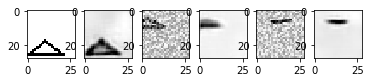

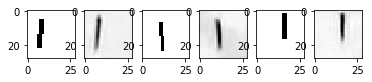

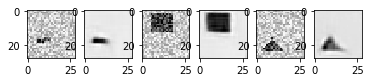

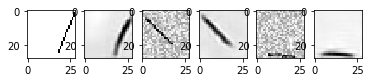

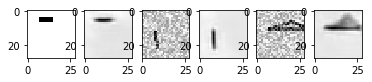

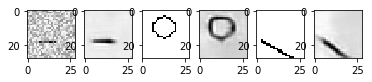

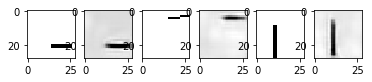

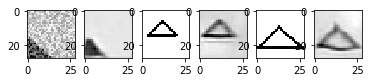

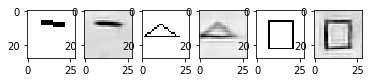

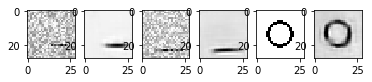

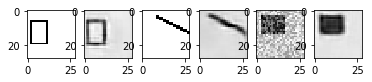

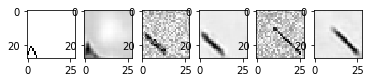

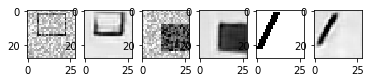

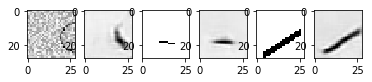

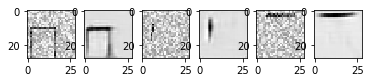

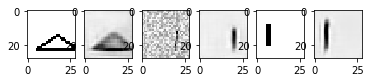

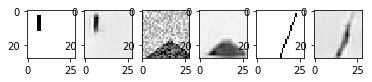

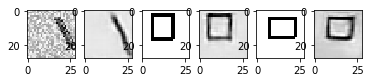

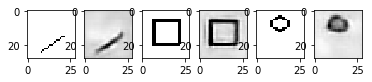

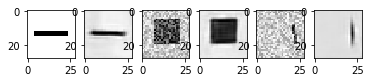

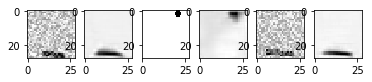

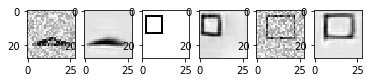

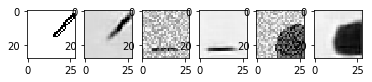

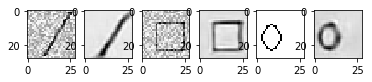

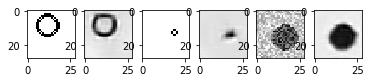

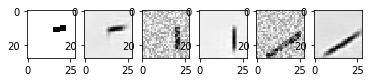

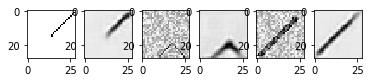

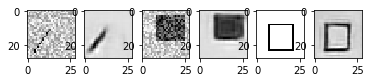

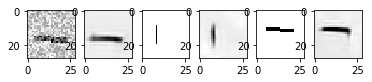

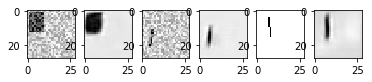

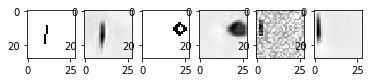

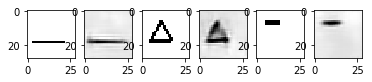

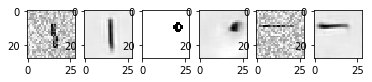

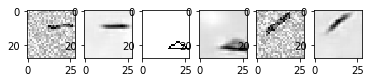

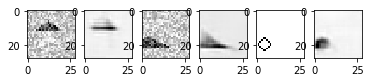

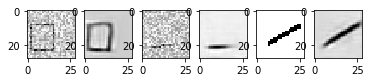

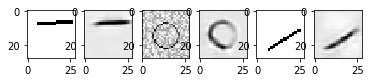

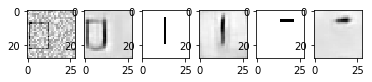

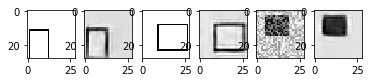

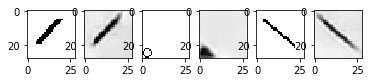

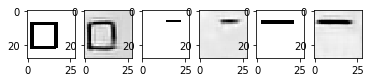

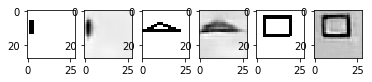

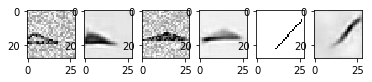

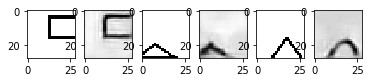

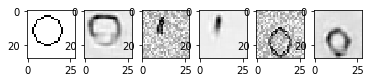

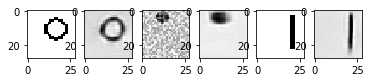

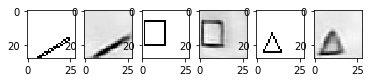

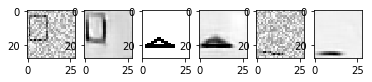

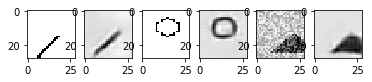

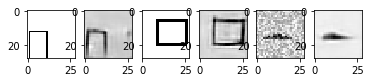

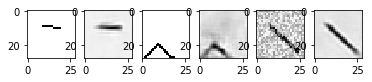

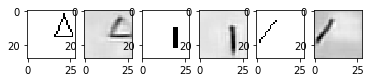

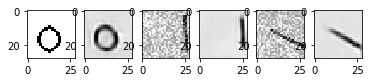

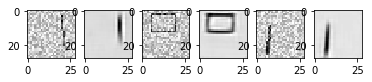

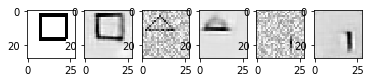

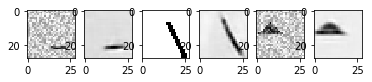

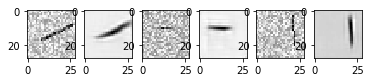

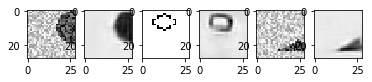

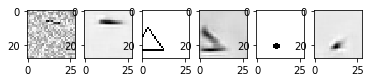

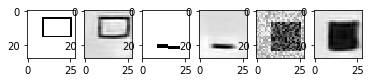

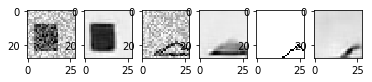

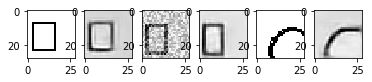

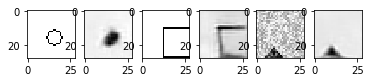

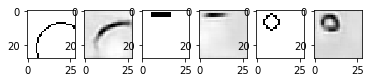

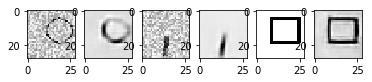

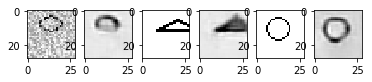

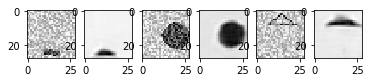

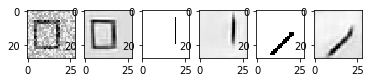

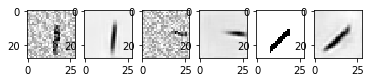

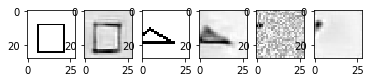

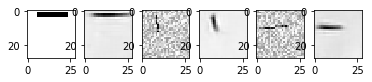

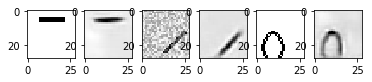

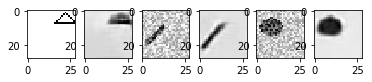

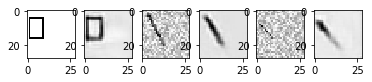

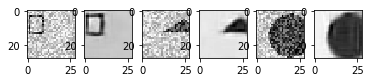

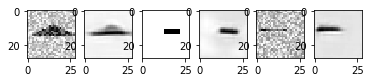

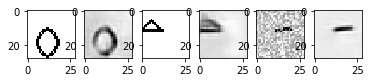

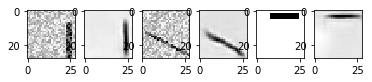

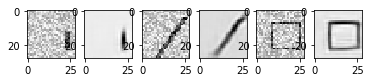

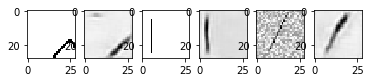

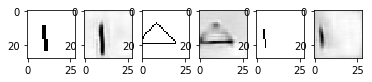

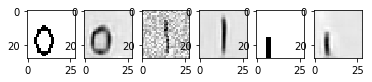

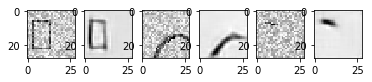

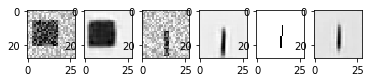

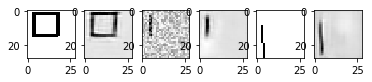

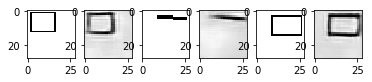

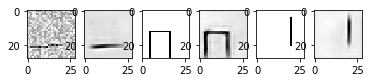

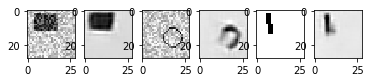

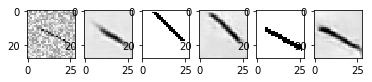

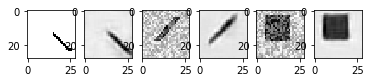

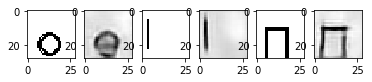

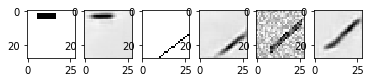

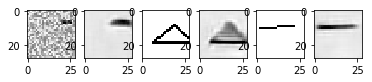

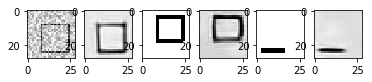

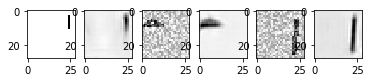

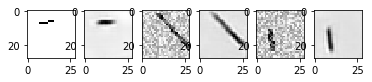

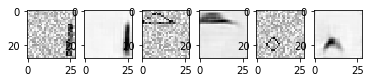

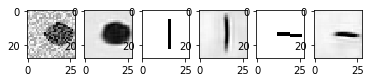

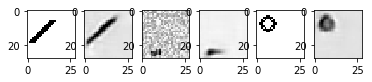

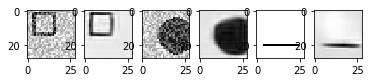

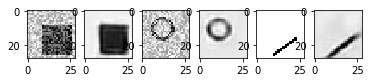

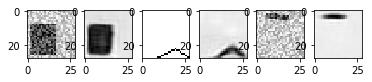

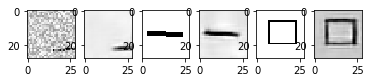

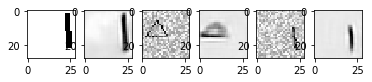

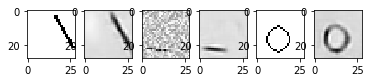

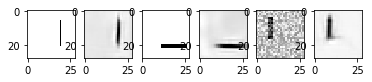

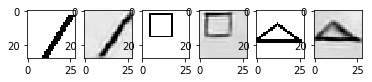

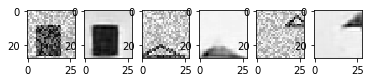

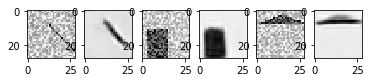

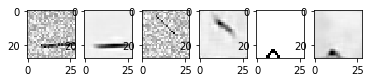

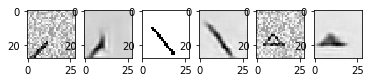

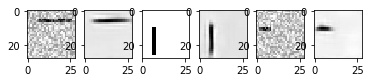

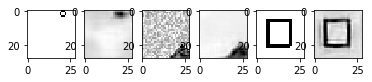

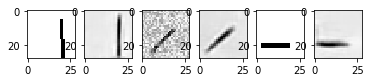

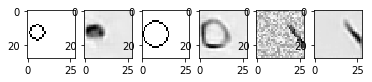

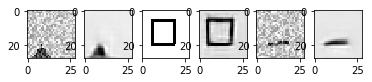

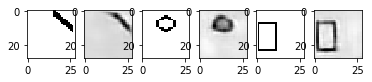

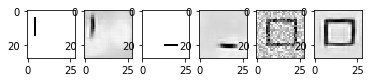

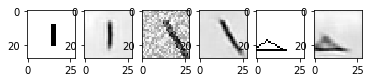

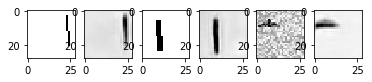

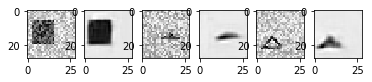

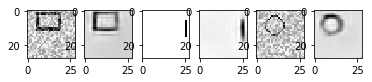

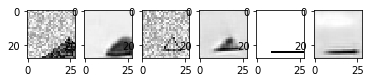

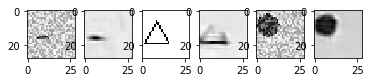

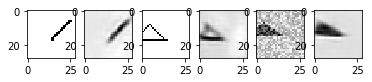

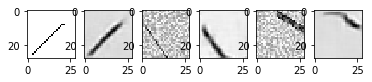

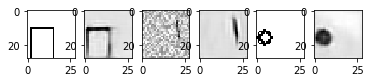

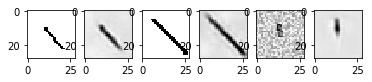

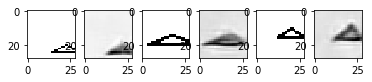

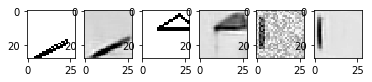

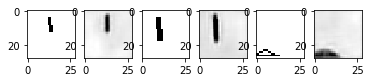

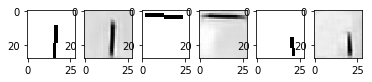

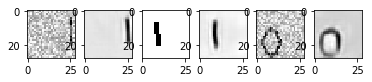

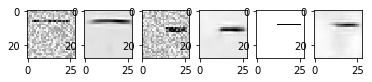

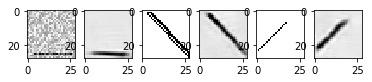

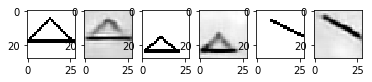

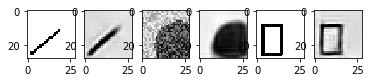

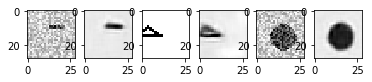

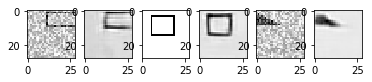

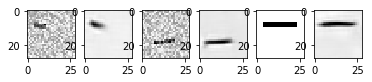

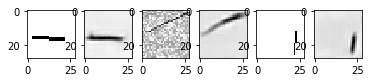

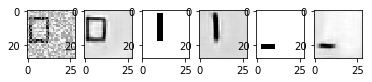

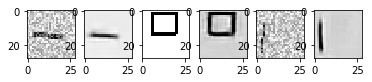

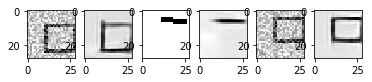

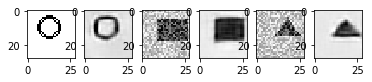

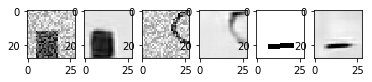

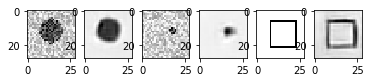

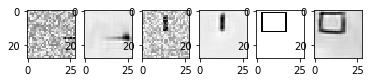

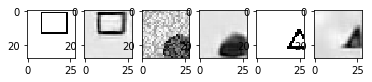

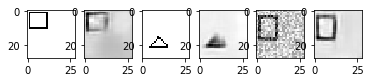

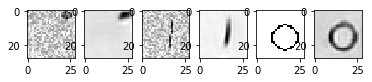

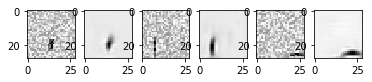

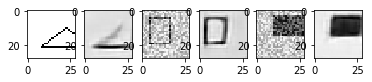

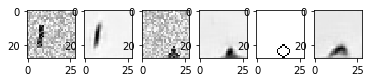

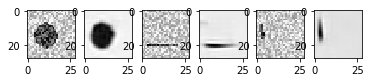

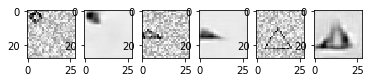

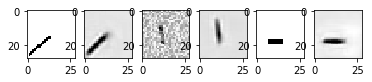

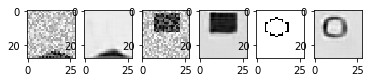

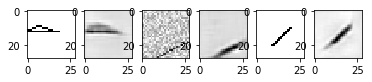

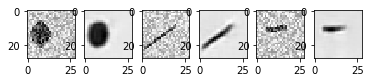

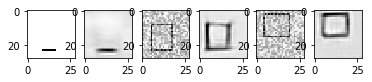

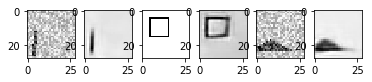

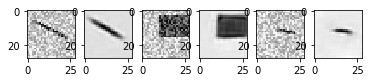

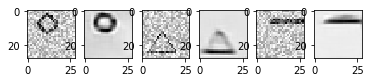

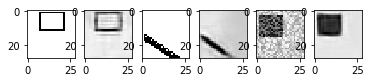

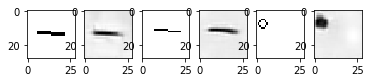

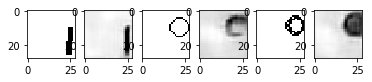

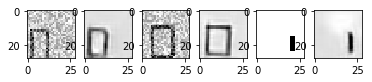

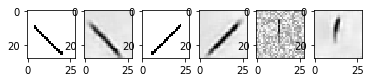

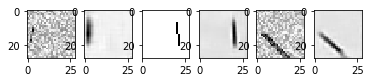

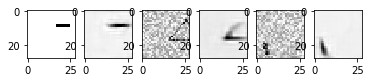

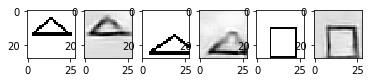

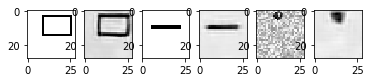

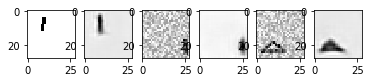

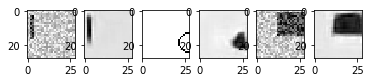

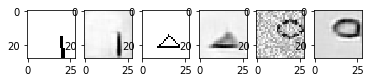

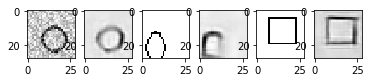

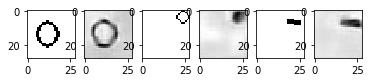

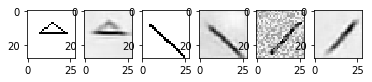

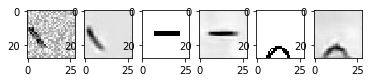

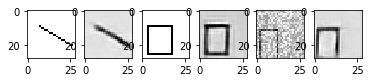

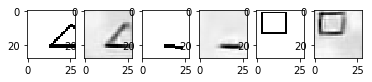

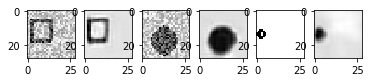

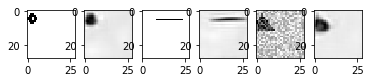

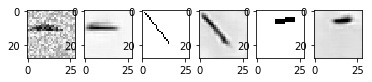

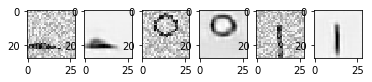

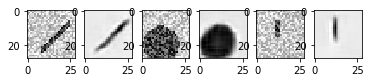

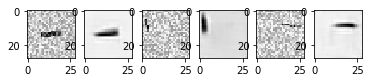

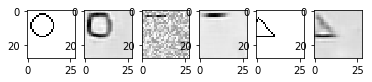

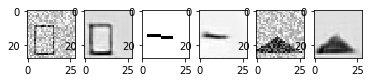

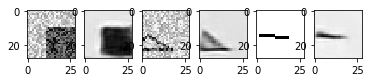

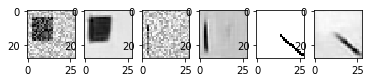

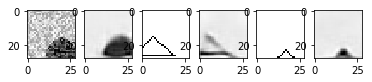

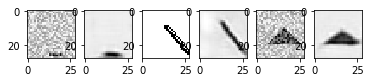

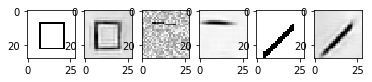

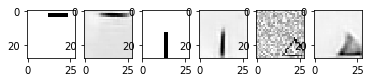

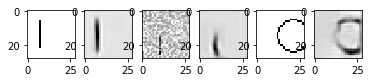

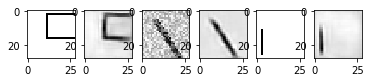

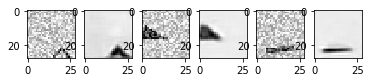

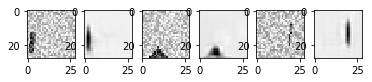

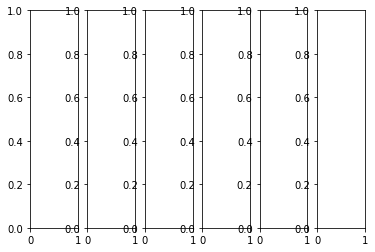

In [24]:
import matplotlib.pyplot as plt

obj = -1
for j in range(len(pred)):
    f, ax = plt.subplots(1,6)
    for i in range(6):
        if i % 2 == 0:
            obj = obj + 1
            if obj >= 600:
                break
            #print(obj)
            ax[i].imshow(x_test[obj].reshape(img_rows, img_cols), cmap=plt.get_cmap('gray'))
        else:
            #print()
            ax[i].imshow(pred[obj].reshape(img_rows, img_cols), cmap=plt.get_cmap('gray'))
    if obj >= 600:
        break
    plt.show()

In [25]:
from keras.models import model_from_json 
json_file = open("origin_cnn_model.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 
loaded_model = model_from_json(loaded_model_json)

In [26]:
loaded_model.load_weights("origin_cnn_model.h5") 
print("Loaded model from disk")

Loaded model from disk


In [27]:
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [28]:
loaded_model.evaluate(x_test, y_test)

1200/1200 [==============================] - 0s 131us/step


[0.08115735116949357, 0.9883333333333333]

In [29]:
loaded_model.evaluate(pred, y_test)

1200/1200 [==============================] - 0s 48us/step


[1.157231505215168, 0.845]

In [30]:
'''
#TEST 1
0.10420278875487289, 0.9822222222222222
2.323088133070204, 0.7855555555555556

#TEST2
0.04724142621778242, 0.9933333333333333
1.7464376485347748, 0.81
'''

'\n#TEST 1\n0.10420278875487289, 0.9822222222222222\n2.323088133070204, 0.7855555555555556\n\n#TEST2\n0.04724142621778242, 0.9933333333333333\n1.7464376485347748, 0.81\n'

In [31]:
get_layer_output = K.function([new_model.layers[0].input], [new_model.layers[11].output])

In [32]:
x_output = get_layer_output([x_train])

In [33]:
x_output.shape
p1 = model.predict(pred)
p1.shape

AttributeError: 'list' object has no attribute 'shape'